#                           Multi Class Classification

In [1]:
import pandas as pd
import numpy as np

## Loading the dataset

In [2]:
from sklearn.datasets import load_iris
iris=load_iris()
data=pd.DataFrame(iris.data,columns=iris.feature_names)
data['target']=iris.target

In [3]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
data.target.value_counts()

,count
target,
0,50
1,50
2,50


## Data Preprocessing

In [7]:
x=data.drop('target',axis=1)
y=data['target']

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
x=StandardScaler().fit_transform(x)


For multi-class classification, we need to one-hot encode the target labels

In [16]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(y)

now we Converted integer labels (e.g., 0, 1, 2) into one-hot encoded vectors

 we have preprocessed the data and Now we are ready to determine our MLP model to perform Multi Class Classification

# Model Building

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [20]:
# Defining the MLP model
model=Sequential([
    Dense(16,activation='relu',input_shape=(x.shape[1],)),
    Dense(8, activation='relu',),
    Dense(3,activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243 (972.00 B)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
# compiling the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training the model

In [29]:
history=model.fit(x,y,epochs=50,batch_size=10,validation_split=0.2)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9811 - loss: 0.0504 - val_accuracy: 0.9667 - val_loss: 0.0990
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9857 - loss: 0.0491 - val_accuracy: 0.9667 - val_loss: 0.1555
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9801 - loss: 0.0452 - val_accuracy: 0.9333 - val_loss: 0.1618
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9819 - loss: 0.0532 - val_accuracy: 0.9333 - val_loss: 0.2130
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9907 - loss: 0.0352 - val_accuracy: 0.9333 - val_loss: 0.1930
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9902 - loss: 0.0366 - val_accuracy: 0.9333 - val_loss: 0.1684
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9980 - loss: 0.0417 - val_accuracy: 0.9333 - val_loss: 0.1849
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9651 - loss: 0.0568 - val_accuracy: 0.9333 - val_loss

## Evaluation

In [26]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x, y)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.9807 - loss: 0.1004
Test Accuracy: 97.33%


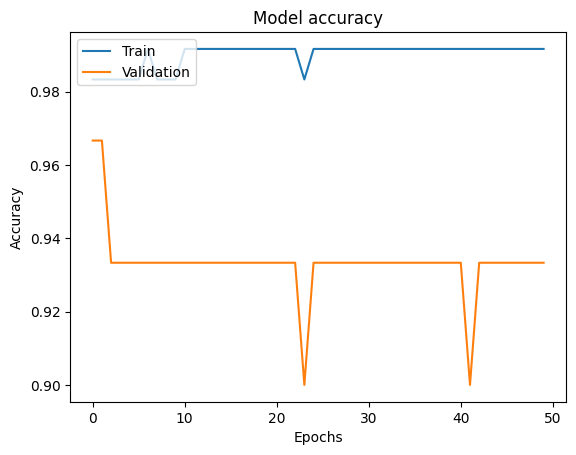

In [30]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

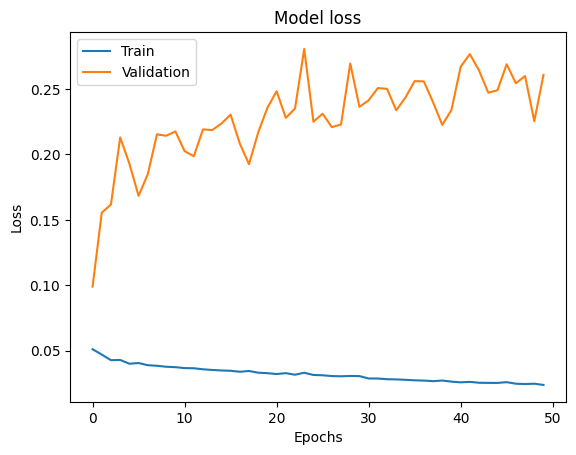

In [31]:
#plot training and loss validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

In [32]:
# Make predictions on the dataset
predictions = model.predict(x)

# Convert predictions to class labels (e.g., 0, 1, 2 for Iris)
predicted_classes = predictions.argmax(axis=-1)

# Print first 5 predictions
print("Predicted classes:", predicted_classes[:5])

# Compare predicted classes with true labels
true_classes = y.argmax(axis=-1)
print("True classes:", true_classes[:5])


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
Predicted classes: [0 0 0 0 0]
True classes: [0 0 0 0 0]


Our model predicts all the classes correctly...

Text(50.722222222222214, 0.5, 'True')

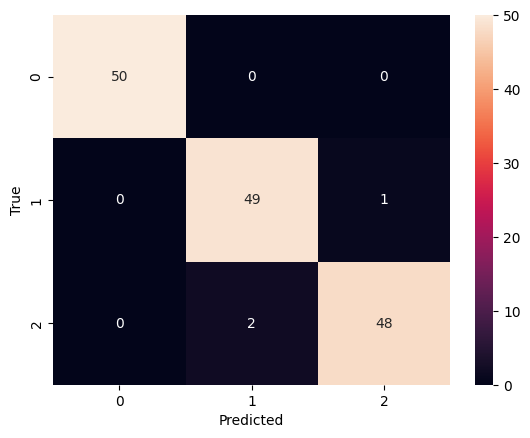

In [34]:
#let us plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(true_classes,predicted_classes)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')